In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from operator import itemgetter
import powerlaw
from networkx.drawing.nx_agraph import graphviz_layout
import pickle
from statistics import mean, stdev
import seaborn as sns

In [2]:
from net_analysis import *

In [3]:
path = "../Dataset FFF/edges.csv"
path1 = "../Dataset FFF/edges_3K.csv"

In [4]:
path_graph = "../Dataset FFF/Graph_data/"

In [5]:
G = nx.read_edgelist(path, comments = "S", delimiter = ",", data=(("Count", int),))
G1 = nx.read_edgelist(path1, comments = "S", delimiter = ",", data=(("Count", int),))

In [6]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 15169
Number of edges: 300987
Average degree:  39.6845


In [7]:
ba_G = nx.barabasi_albert_graph(G.number_of_nodes(), 7, seed = 42)
ba_G1 = nx.barabasi_albert_graph(G.number_of_nodes(), 7, seed = 42)
print("Nodes:",ba_G.number_of_nodes())
print("Edges:",ba_G.number_of_edges())

Nodes: 15169
Edges: 106134


In [8]:
nx.write_graphml(ba_G, path_graph+"BA_Network.graphml")

# 1 - Degree Distribution

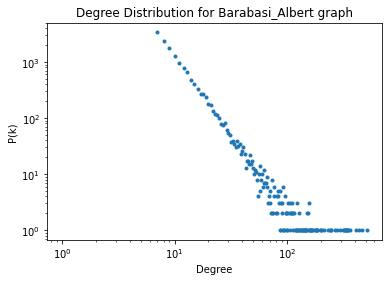

In [9]:
degree_dist(ba_G, "Barabasi_Albert", "BA")

Calculating best minimal value for power law fit
**** Degree Distribution for Barabasi_Albert graph ****


C:\Users\marco\Documents\sna-project-2022_cosmo_d-arrigo_esposito\2 - NetworkAnalysis\net_analysis.py:40: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((min(degree), max(degree)))


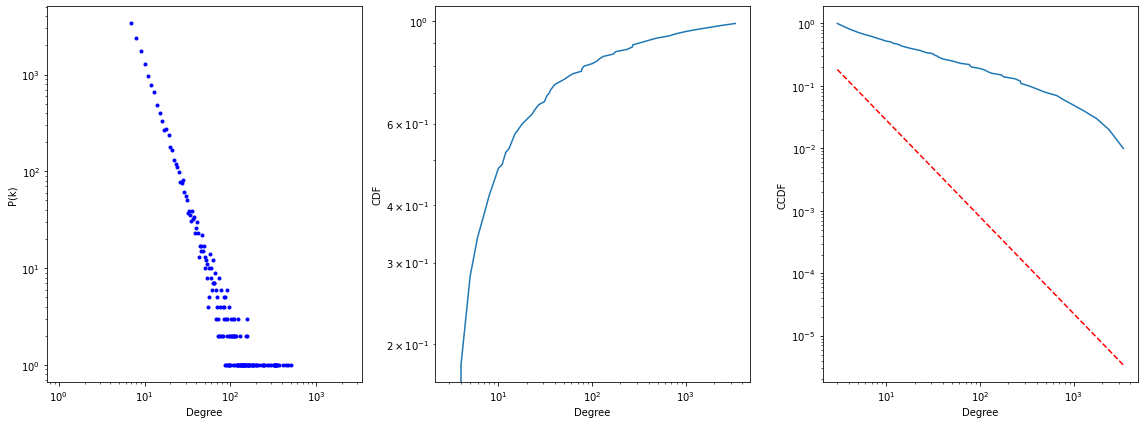

alpha=2.550831467860618 sigma=0.055083146786061785


In [10]:
plot_dist(ba_G, "Barabasi_Albert", "BA")

In [11]:
info_degree(ba_G , "Barabasi_Albert")

***** Degree info for Barabasi_Albert graph ***
Maximum degree: (511, 8)
Minimum degree: (7, 2319)


# 2 - Connected Components

In [12]:
components = n_connected_components(ba_G1 , "Barabasi_Albert")

**** Connected components for Barabasi_Albert graph ****
Number of Connected Components for Barabasi_Albert: 1
	 component len = 15169


# 3 - Path Analysis

In [13]:
path_analysis(ba_G1 , "Barabasi_Albert", components)

***** Path analysis for Barabasi_Albert graph


KeyboardInterrupt: 

# 4 - Clustering Coefficient 

In [ ]:
name, values = c_coefficient_analysis(ba_G1 , "Barabasi_Albert")

In [ ]:
degree_clustering(ba_G1 , "Barabasi_Albert", "BA")

# 5 - Density Analysis

In [ ]:
density_analysis(ba_G1 , "Barabasi_Albert")